# Fashion MNIST dataset
download it with this [link](https://storage.googleapis.com/kaggle-datasets/2243/9243/fashionmnist.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1516112688&Signature=az%2BE%2Bs21Kg1wHjVZMQZNa1SGN4RPHms9xBGXQwqOZyWW1gdm8I0JQsuwNxEihntJ%2Bxs62ICHRzjmlJ%2B7zzyQe8C%2Fy%2BkgKVwyGbo5iGafbIxVRYfqznnT0SBy04S%2BV%2FUbeMLX8LWxkP1lPSOWo%2B5N8fpyQgNNI03qffARUNlNhl8FFBaHpFyZyPDQo114C1cXbF3EW4nWnUuCSuaKJy4bsU2NGqmRVJWu9aZKBGA9UUVwircEwCl3clUmMixex6xVxUYuak6PkztsKmjQpuGPT3l3C9KkQdNUWrdmog7WgsJRllr5j8xhMuYH4WYKWL7ztg2ekyBpNa3brR%2Bff%2Fjp%2Bg%3D%3D) and extract in current directory.

In [1]:
from keras.layers import Conv2D, Dense, Activation, Input, Reshape, Merge, Concatenate, merge, add, UpSampling2D
from keras.models import Sequential, Model
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
import pandas as pd
import numpy as np

In [3]:
classes = 11

In [4]:
def getndata(data, num_classes):
    def getx(col):
        return np.array(col[1][1:])

    def gety(col):
        return col[1][0]
    data = data.T
    xdata = np.array(list(map(getx, data.items())))
    ydata = np.array(list(map(gety, data.items())))
    xdata = xdata.reshape((-1, 28, 28, 1))
    ydata = to_categorical(y=ydata, num_classes=num_classes)
    xdata = xdata.astype(int)
    xdatan = xdata/255
    ndata = np.array(list(zip(ydata, xdatan)))
    return ndata

In [5]:
ndata = getndata(pd.read_csv('./fashion-mnist_train.csv'), classes )

In [6]:
def random_batch(ndata, train_set_ratio = 0.7 ): #70% of data is for training rest are for testing
    assert train_set_ratio < 1
    assert train_set_ratio > 0
    border = int(len(ndata) * train_set_ratio)
    np.random.shuffle(ndata)
    ydata, xdata = ndata.T
    xdata = np.array(list(xdata))
    ydata = np.array(list(ydata))
    xtrain = xdata[:border]
    xtest = xdata[border:]
    ytrain = ydata[:border]
    ytest = ydata[border:]
    return (xtrain, ytrain), (xtest, ytest)

In [7]:
(xtrain, ytrain), (xtest, ytest) = random_batch(ndata, 0.8)

In [8]:
# discriminator model
input_layer = Input(shape = xtrain.shape[1:])
conv_1 = Conv2D(kernel_size=3, filters=1, activation='tanh')(input_layer)
conv_2 = Conv2D(kernel_size=3, filters=1, activation='relu')(conv_1)
conv_3 = Conv2D(kernel_size=3, filters=1, activation='tanh')(conv_2)
conv_4 = Conv2D(kernel_size=3, filters=1, activation='relu')(conv_3)
conv_5 = Conv2D(kernel_size=3, filters=1, activation='tanh')(conv_4)
conv_6 = Conv2D(kernel_size=3, filters=1, activation='relu')(conv_5)
conv_7 = Conv2D(kernel_size=3, filters=1, activation='tanh')(conv_6)
reshape_1 = Reshape((-1,))(conv_1)
reshape_2 = Reshape((-1,))(conv_2)
reshape_3 = Reshape((-1,))(conv_3)
reshape_4 = Reshape((-1,))(conv_4)
reshape_5 = Reshape((-1,))(conv_5)
reshape_6 = Reshape((-1,))(conv_6)
reshape_7 = Reshape((-1,))(conv_7)
# merge_1 = Merge(list(map(lambda x:Model(input_layer, x),
#                          [reshape_1, reshape_2, reshape_3, reshape_4])), mode = 'concat')
concat_1 = merge([reshape_1, reshape_2, 
                  reshape_3, reshape_4, 
                  reshape_5, reshape_6, reshape_7], mode='concat')
dense_1 = Dense(units = 512,  activation='relu')(concat_1)
dense_1 = Dense(units = 256,  activation = 'sigmoid')(dense_1)
output_layer = Dense(units = classes,  activation = 'sigmoid')(dense_1)
model = Model(input_layer, output_layer)
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics = ['accuracy'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 26, 26, 1)    10          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 24, 24, 1)    10          conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 22, 22, 1)    10          conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_4 (

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
/usr/local/lib/python3.6/dist-packages/keras/legacy/layers.py:458: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)


In [9]:
model.fit(xtrain, ytrain, epochs=1, batch_size=500, validation_data=(xtest, ytest))

Train on 48000 samples, validate on 12000 samples
Epoch 1/1
48000/48000 [==============================] - 56s 1ms/step - loss: 0.7469 - acc: 0.7558 - val_loss: 0.4777 - val_acc: 0.8280


In [10]:
# generative model
d_input = Input(shape=(100,))


x = Dense(units = 14 * 14 ,activation = 'sigmoid')(d_input)
x = Dense(units = 14 * 14 ,activation = 'tanh')(x)
x = Dense(units = 14 * 14 ,activation = 'relu')(x)
x = Reshape((14, 14, 1))(x)
x = UpSampling2D(size=(2))(x)
x = Activation("relu")(x)
generator = Model(d_input, x)
generator.compile(loss="binary_crossentropy", optimizer="adam")
generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 196)               19796     
_________________________________________________________________
dense_5 (Dense)              (None, 196)               38612     
_________________________________________________________________
dense_6 (Dense)              (None, 196)               38612     
_________________________________________________________________
reshape_8 (Reshape)          (None, 14, 14, 1)         0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 28, 28, 1)         0         
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 1)         0         
Total para

In [11]:
# Gen Adv Net

g_input = Input(shape=(100,))
stack = generator(g_input)
stack = model(stack)
GAN = Model(g_input, stack)
GAN.summary()
GAN.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 100)               0         
_________________________________________________________________
model_2 (Model)              (None, 28, 28, 1)         97020     
_________________________________________________________________
model_1 (Model)              (None, 11)                1625681   
Total params: 1,722,701
Trainable params: 1,722,701
Non-trainable params: 0
_________________________________________________________________


In [12]:
# swtiching model trainability
def trainable(model, value):
    model.trainable = value
    for layer in model.layers:
        layer.trainable = value
    

In [14]:
from collections import defaultdict #for storing loss
from itertools import chain # for combining noise and real data

In [15]:

def train(ndata, data_split_ratio = 0.8, noise_batch = 5000, epochs = 1, lossdict = defaultdict(list)):
    batch = noise_batch
    for i in range(epochs):
        print("Iteration :", i)
        (xtrain, ytrain), (xtest, ytest) = random_batch(ndata, data_split_ratio)
        xirandom = np.random.uniform(0, 1, size = (batch, 100))

        yidata = np.zeros(batch * classes).reshape((batch, classes))
        yidata[:,10] = 1
        xidata = generator.predict(xirandom)
        xindata = np.array(list(chain(xtrain, xidata)))
        yindata = np.array(list(chain(ytrain, yidata)))

        trainable(model, True)
        h = model.fit(xindata, yindata, 
                      verbose = 1, epochs = 1, 
                      shuffle = True, batch_size = 500, 
                      validation_data=(xtest, ytest))

        lossdict['d'] += h.history['loss']
        trainable(model, False)
        xirandom = np.random.uniform(0, 1, size = (batch, 100))
        h = GAN.fit(xirandom, yidata, verbose = 1, epochs = 1)
        lossdict['g'] += h.history['loss']
    return lossdict

In [24]:
loss = train(ndata, epochs = 10)

Iteration : 0
Train on 53000 samples, validate on 12000 samples
Epoch 1/1
53000/53000 [==============================] - 59s 1ms/step - loss: 0.3138 - acc: 0.8852 - val_loss: 0.3257 - val_acc: 0.8792
Epoch 1/1
  64/5000 [..............................] - ETA: 11s - loss: 7.5228e-07 - acc: 1.0000

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:973: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


5000/5000 [==============================] - 11s 2ms/step - loss: 1.3378e-07 - acc: 1.0000
Iteration : 1
Train on 53000 samples, validate on 12000 samples
Epoch 1/1
53000/53000 [==============================] - 64s 1ms/step - loss: 0.2821 - acc: 0.8955 - val_loss: 0.3080 - val_acc: 0.8888
Epoch 1/1
5000/5000 [==============================] - 12s 2ms/step - loss: 2.7242e-07 - acc: 1.0000
Iteration : 2
Train on 53000 samples, validate on 12000 samples
Epoch 1/1
53000/53000 [==============================] - 66s 1ms/step - loss: 0.2584 - acc: 0.9038 - val_loss: 0.2703 - val_acc: 0.9027
Epoch 1/1
5000/5000 [==============================] - 12s 2ms/step - loss: 1.9080e-07 - acc: 1.0000
Iteration : 3
Train on 53000 samples, validate on 12000 samples
Epoch 1/1
53000/53000 [==============================] - 63s 1ms/step - loss: 0.2338 - acc: 0.9134 - val_loss: 0.2670 - val_acc: 0.8982
Epoch 1/1
5000/5000 [==============================] - 12s 2ms/step - loss: 1.4080e-07 - acc: 1.0000
Iterat

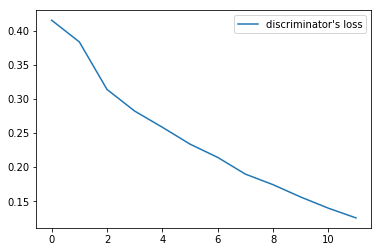

In [28]:
plt.plot(loss['d'], label = "discriminator's loss")
plt.legend()
plt.show()


453.365


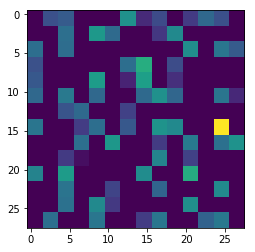

451.263


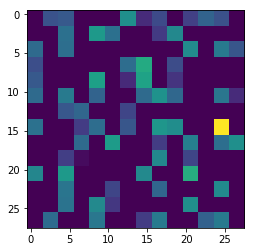

In [29]:

imgs = generator.predict(np.random.uniform(0, 1, size = (2, 100)))
for img in imgs:
    img = img.reshape((28, 28))
    print(np.sum(img))
    plt.imshow(img)
    plt.show()

In [30]:
%%sh
ls -lah

total 270M
drwxr-xr-x  4 junaid junaid 4.0K Jan 14 18:06 .
drwxrwxr-x 73 junaid junaid 4.0K Jan 12 20:24 ..
-rw-r--r--  1 junaid junaid  22M Dec  7 00:54 fashion-mnist_test.csv
-rw-r--r--  1 junaid junaid 127M Dec  7 00:54 fashion-mnist_train.csv
-rw-rw-r--  1 junaid junaid  69M Jan 13 19:55 fashionmnist.zip
drwxr-xr-x  8 junaid junaid 4.0K Jan 14 11:14 .git
-rw-r--r--  1 junaid junaid 1.2K Nov 25 15:29 .gitignore
drwxr-xr-x  2 junaid junaid 4.0K Jan 14 17:46 .ipynb_checkpoints
-rw-r--r--  1 junaid junaid  50K Jan 14 18:06 kaggle fashion dataset.ipynb
-rw-r--r--  1 junaid junaid 1.1K Nov 25 15:29 LICENSE
-rw-r--r--  1 junaid junaid   81 Nov 25 15:35 README.md
-rw-r--r--  1 junaid junaid 7.5M Dec  7 00:54 t10k-images-idx3-ubyte
-rw-r--r--  1 junaid junaid 9.8K Dec  7 00:54 t10k-labels-idx1-ubyte
-rw-r--r--  1 junaid junaid  45M Dec  7 00:54 train-images-idx3-ubyte
-rw-r--r--  1 junaid junaid  59K Dec  7 00:54 train-labels-idx1-ubyte


In [31]:
tdata = getndata(pd.read_csv("fashion-mnist_test.csv"), num_classes=classes)

In [32]:
def makedata(tdata):
    y, x = tdata.T
    y = np.array(list(y))
    x = np.array(list(x))  
    return x, y

testx, testy = makedata(tdata)

In [33]:
model.evaluate(testx, testy)

10000/10000 [==============================] - 9s 863us/step


[0.32691863688528539, 0.89100000000000001]

In [34]:
print("pretty good")

pretty good
